In [238]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from scipy.optimize import minimize

### Subtask 1

In [3]:
def f_1(x):
    return x ** 3


def f_2(x):
    return math.fabs(x - 0.2)


def f_3(x):
    return x * math.sin(1 / x)


f_1_restrictions = (0, 1)
f_2_restrictions = (0, 1)
f_3_restrictions = (0.01, 1)

e = 0.001

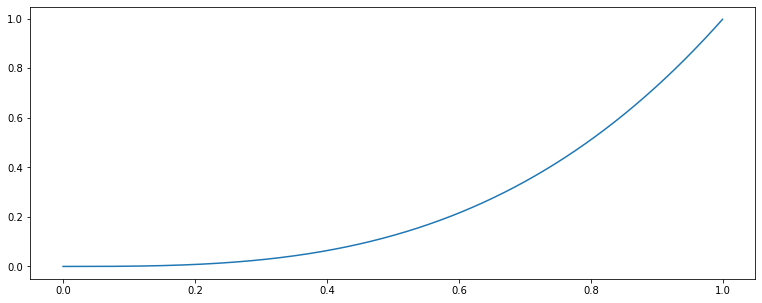

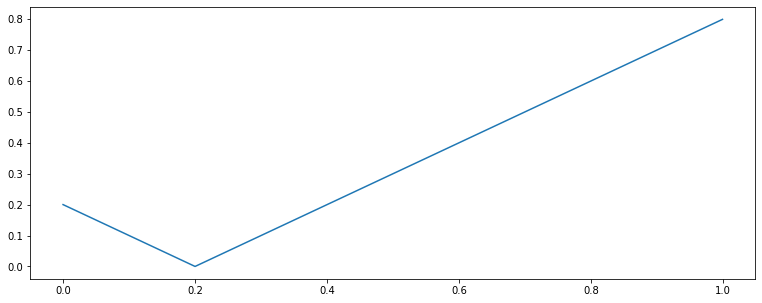

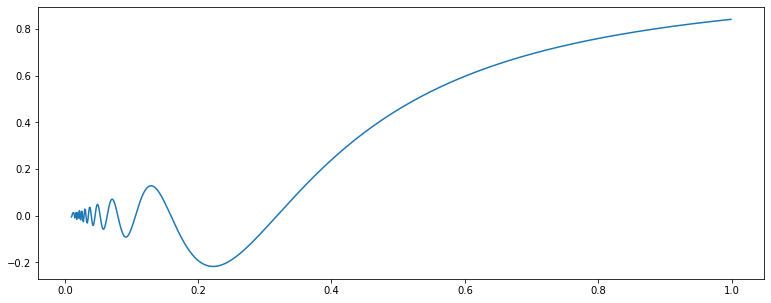

In [183]:
r = np.arange(*f_1_restrictions, e)
plt.figure(figsize=(13, 5))
plt.plot(r, [f_1(x) for x in r])
plt.show()

r = np.arange(*f_2_restrictions, e)
plt.figure(figsize=(13, 5))
plt.plot(r, [f_2(x) for x in r])
plt.show()

r = np.arange(*f_3_restrictions, e)
plt.figure(figsize=(13, 5))
plt.plot(r, [f_3(x) for x in r])
plt.show()

In [25]:
func_call = 0


def counter(func):
    def internal_counter(*x):
        global func_call
        func_call += 1
        return func(*x)

    return internal_counter

In [185]:


def brute_force_search(func, restrictions, eps):
    iters = 0
    a, b = restrictions
    n = math.ceil((b - a) / eps)
    f_min = float("inf")
    x_min = float("inf")
    for k in range(0, n + 1):
        iters += 1
        arg = a + k * ((b - a) / n)
        f_calc = func(arg)
        if f_calc < f_min:
            f_min = f_calc
            x_min = arg
    return f_min, x_min, iters


def dichotomy_method(func, restrictions, eps):
    iters = 0
    a, b = restrictions
    while math.fabs(a - b) > eps:
        iters += 1

        delta = eps / 3
        x1, x2 = ((a + b) / 2 - delta, (a + b) / 2 + delta)

        fx1 = func(x1)
        fx2 = func(x2)
        if fx1 < fx2:
            a1, b1 = a, x2
        elif fx1 > fx2:
            a1, b1 = x1, b
        else:
            a1, b1 = x1, x2
        a, b = a1, b1
    x_min = (a + b) / 2
    f_min = func(x_min)
    return f_min, x_min, iters


def golden_ratio_method(func, restrictions, eps):
    iters = 0
    a, b = restrictions
    c1 = (3 - math.sqrt(5)) / 2
    c2 = (math.sqrt(5) - 3) / 2
    while math.fabs(a - b) > eps:
        iters += 1

        x1, x2 = (a + c1 * (b - a), b + c2 * (b - a))

        fx1 = func(x1)
        fx2 = func(x2)
        if fx1 < fx2:
            a1, b1 = a, x2
        elif fx1 > fx2:
            a1, b1 = x1, b
        else:
            a1, b1 = x1, x2
        a, b = a1, b1
    x_min = (a + b) / 2
    f_min = func(x_min)
    return f_min, x_min, iters


In [263]:
def get_result(func, restrictions, optim_func, e):
    global func_call
    func_call = 0
    f_min, x_min, iters = optim_func(counter(func), restrictions, e)
    print(round(f_min, 5), round(x_min, 5), func_call, iters)

In [264]:
get_result(f_1, f_1_restrictions, brute_force_search, e)
get_result(f_2, f_2_restrictions, brute_force_search, e)
get_result(f_3, f_3_restrictions, brute_force_search, e)

0.0 0.0 1001 1001
0.0 0.2 1001 1001
-0.21722 0.223 991 991


In [265]:
get_result(f_1, f_1_restrictions, dichotomy_method, e)
get_result(f_2, f_2_restrictions, dichotomy_method, e)
get_result(f_3, f_3_restrictions, dichotomy_method, e)

0.0 0.00046 25 12
3e-05 0.20003 25 12
-0.21723 0.22252 25 12


In [266]:
get_result(f_1, f_1_restrictions, golden_ratio_method, e)
get_result(f_2, f_2_restrictions, golden_ratio_method, e)
get_result(f_3, f_3_restrictions, golden_ratio_method, e)

0.0 0.00037 31 15
7e-05 0.20007 31 15
-0.21723 0.22272 31 15


### Subtask 2

In [117]:
alpha = random.random()
beta = random.random()
alpha, beta

(0.6745420836696363, 0.1166898321484573)

In [149]:
k = 100

In [150]:
arr = [alpha * (x / k) + beta + np.random.normal(0, 1) for x in range(k)]

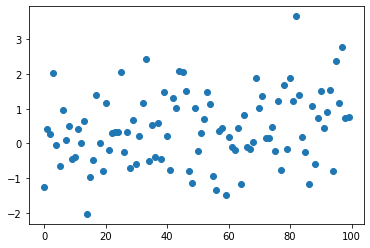

In [151]:
plt.plot(range(k), arr, 'o')
plt.show()

In [244]:
def lin_func(x, a, b):
    return a * x + b

def rational_func(x, a, b):
    return a / (1 + b * x)

In [163]:
def func_to_optim(a, b, true_arr, approximate_func):
    return sum([(approximate_func(x / k, a, b) - true_arr[x]) ** 2 for x in range(k)])

In [245]:
optim_lin_func = lambda a, b: func_to_optim(a, b, arr, lin_func)
optim_rat_func = lambda a, b: func_to_optim(a, b, arr, rational_func)

In [170]:
def brute_force(a_lims, b_lims, eps, func):
    func_min = float("inf")
    a_min, b_min = 0, 0
    for a in tqdm(np.arange(a_lims[0], a_lims[1] + eps, eps)):
        for b in np.arange(b_lims[0], b_lims[1] + eps, eps):
            func_value = func(a, b)
            if func_value < func_min:
                a_min = a
                b_min = b
                func_min = func_value
    return a_min, b_min

In [172]:
a_found_brute_force, b_found_brute_force = brute_force((0, 1), (0, 1), 0.001, optim_lin_func)

100%|██████████| 1001/1001 [01:05<00:00, 15.38it/s]


(0.839, 0.0)

In [226]:
def gauss_method(a_init, b_init, a_lims, b_lims, eps, func):
    a, b = a_init, b_init
    a_old, b_old = a, b
    iters = 0

    while (math.fabs(a_old - a) + math.fabs(b_old - b)) / 2 > eps or iters == 0:
        iters += 1
        a_old, b_old = a, b
        _, b, _ = golden_ratio_method(lambda x: func(a, x), b_lims, eps)
        _, a, _ = golden_ratio_method(lambda x: func(x, b), a_lims, eps)

    return a, b

In [230]:
a_found_gauss_method, b_found_gauss_method = gauss_method(0, 0, (0, 1), (0, 1), 0.001, optim_lin_func)

In [241]:
minimize(lambda x: optim_lin_func(*x), (0, 0), method="Nelder-Mead")

 final_simplex: (array([[ 0.84952251, -0.00688972],
       [ 0.84946355, -0.00687964],
       [ 0.8495969 , -0.00693557]]), array([97.87546349, 97.8754635 , 97.87546353]))
           fun: 97.8754634878333
       message: 'Optimization terminated successfully.'
          nfev: 121
           nit: 63
        status: 0
       success: True
             x: array([ 0.84952251, -0.00688972])

In [242]:
a_found_nelder_mead_method, b_found_nelder_mead_method = 0.84952251, -0.00688972

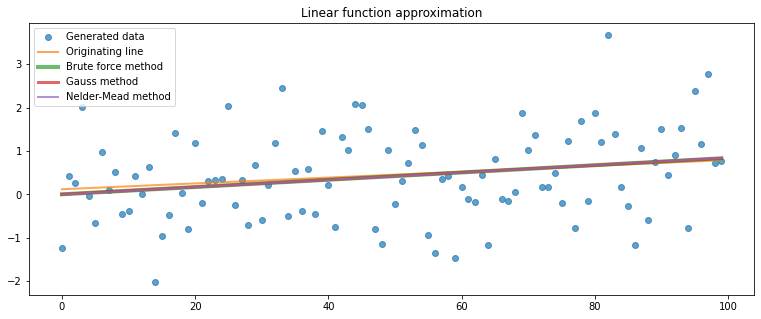

In [243]:
plt.figure(figsize=(13, 5))
plt.plot(range(k), arr, 'o', alpha=0.7, label="Generated data")
plt.plot(range(k), [lin_func(x / k, alpha, beta) for x in range(k)], linewidth=2, alpha=0.7, label="Originating line")
plt.plot(range(k), [lin_func(x / k, a_found_brute_force, b_found_brute_force) for x in range(k)], linewidth=4, alpha=0.7,
         label="Brute force method")
plt.plot(range(k), [lin_func(x / k, a_found_gauss_method, b_found_gauss_method) for x in range(k)], linewidth=3, alpha=0.7,
         label="Gauss method")
plt.plot(range(k), [lin_func(x / k, a_found_nelder_mead_method, b_found_nelder_mead_method) for x in range(k)], linewidth=2, alpha=0.7,
         label="Nelder-Mead method")
plt.title('Linear function approximation')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(13, 5))
plt.plot(range(k), arr, 'o', alpha=0.7, label="Generated data")
plt.plot(range(k), [lin_func(x / k, alpha, beta) for x in range(k)], linewidth=2, alpha=0.7, label="Originating line")
plt.plot(range(k), [lin_func(x / k, a_found_brute_force, b_found_brute_force) for x in range(k)], linewidth=4, alpha=0.7,
         label="Brute force method")
plt.plot(range(k), [lin_func(x / k, a_found_gauss_method, b_found_gauss_method) for x in range(k)], linewidth=3, alpha=0.7,
         label="Gauss method")
plt.plot(range(k), [lin_func(x / k, a_found_nelder_mead_method, b_found_nelder_mead_method) for x in range(k)], linewidth=2, alpha=0.7,
         label="Nelder-Mead method")
plt.title('Linear function approximation')
plt.legend()
plt.show()

In [246]:
a_rat_brute_force, b_rat_brute_force = brute_force((0, 1), (0, 1), 0.001, optim_rat_func)
a_rat_gauss_method, b_rat_gauss_method = gauss_method(0, 0, (0, 1), (0, 1), 0.001, optim_rat_func)

100%|██████████| 1001/1001 [01:20<00:00, 12.36it/s]


In [252]:
minimize(lambda x: optim_rat_func(*x), (0, 0), method="Nelder-Mead")

 final_simplex: (array([[ 0.17608829, -0.87844874],
       [ 0.1759895 , -0.87852285],
       [ 0.17610635, -0.87835611]]), array([96.50341101, 96.50341148, 96.5034116 ]))
           fun: 96.50341101477885
       message: 'Optimization terminated successfully.'
          nfev: 130
           nit: 70
        status: 0
       success: True
             x: array([ 0.17608829, -0.87844874])

In [248]:
a_rat_brute_force, b_rat_brute_force

(0.41400000000000003, 0.0)

In [249]:
a_rat_gauss_method, b_rat_gauss_method

(0.4136688137015251, 0.0003665687179287029)

In [253]:
a_rat_nelder_mead_method, b_rat_nelder_mead_method = 0.17608829, -0.87844874

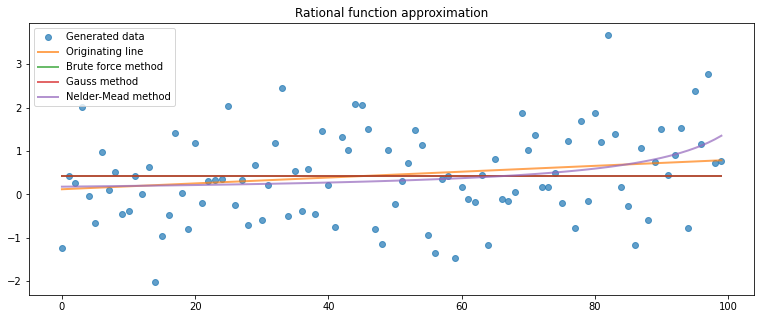

In [268]:
plt.figure(figsize=(13, 5))
plt.plot(range(k), arr, 'o', alpha=0.7, label="Generated data")
plt.plot(range(k), [lin_func(x / k, alpha, beta) for x in range(k)], linewidth=2, alpha=0.7, label="Originating line")
plt.plot(range(k), [rational_func(x / k, a_rat_brute_force, b_rat_brute_force) for x in range(k)], linewidth=2, alpha=0.7,
         label="Brute force method")
plt.plot(range(k), [rational_func(x / k, a_rat_gauss_method, b_rat_gauss_method) for x in range(k)], linewidth=2, alpha=0.7,
         label="Gauss method")
plt.plot(range(k), [rational_func(x / k, a_rat_nelder_mead_method, b_rat_nelder_mead_method) for x in range(k)], linewidth=2, alpha=0.7,
         label="Nelder-Mead method")
plt.title('Rational function approximation')
plt.legend()
plt.show()